 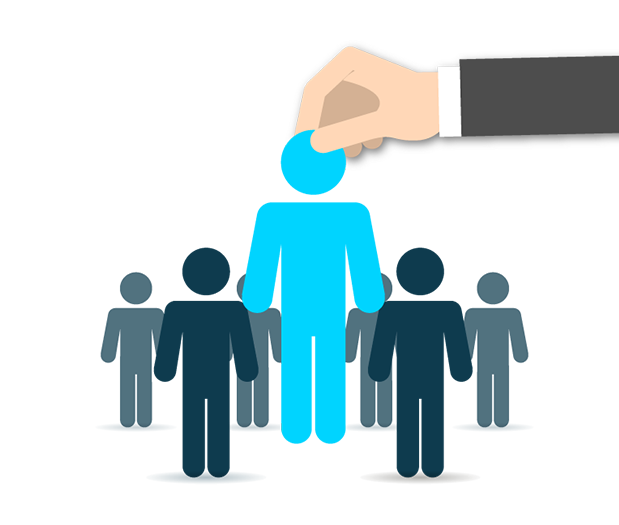

 # Placement Prediction Using XGBoost Classifier and randomizedSearchCV

### Importing necessary Libraries

In [1]:
# Basic
import numpy as np
import pandas as pd
import os

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DEEP LEARNING PROJECTS/PlacementPrediction Using RSCV & GSCV/collegePlace.csv')
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


### Preprocessing data

In [3]:
data.shape

(2966, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
data.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [6]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

### Gender and Stream cols are object type

#### Encoding Categorcal data

In [7]:
data['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [8]:
data['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [9]:
LE = LabelEncoder()
catCols = ['Gender','Stream']

for cols in catCols:
  data[cols] = LE.fit_transform(data[cols])

In [10]:
data[['Gender','Stream']].head()

,Gender,Stream
0,1,3
1,0,1
2,0,4
3,1,4
4,1,5


In [11]:
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


## Splitting data into X and y

In [13]:
X = data.drop(['PlacedOrNot'],axis=1)
y = data['PlacedOrNot']

In [14]:
y = pd.DataFrame(y)

In [15]:
X.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,3,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,4,1,6,0,0
3,21,1,4,0,8,0,1
4,22,1,5,0,8,1,0


In [16]:
y.head()

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1


## Splitting Train test data


In [17]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)

XGBoost Classifier

In [18]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score

In [19]:
# Define the Model
clf = XGBClassifier(learning_rate=0.09,n_estimators=100,use_label_encoder=False,random_state=42)

clf.fit(X_train,y_train,eval_metric='logloss')
predictions = clf.predict(X_valid)
print('accuracy_score: ' + str(accuracy_score(y_valid,predictions)* 100))

accuracy_score: 89.39393939393939


In [20]:
print('f1_score: ' + str(f1_score(y_valid,predictions)*100))

f1_score: 89.1566265060241


In [21]:
predictions

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [22]:
X.head(20)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,3,1,8,1,1
1,21,0,1,0,7,1,1
2,22,0,4,1,6,0,0
3,21,1,4,0,8,0,1
4,22,1,5,0,8,1,0
5,22,1,3,0,6,0,0
6,21,1,1,0,7,0,1
7,21,1,4,1,7,0,0
8,21,1,1,2,6,0,0
9,21,0,1,1,6,1,0


In [23]:
data['Stream'].unique()

array([3, 1, 4, 5, 2, 0])

## Using Randomzed seach CV

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100,stop =1200,num=12)]

learning_rate = [float(x) for x in [0.9,0.1,0.09,0.01]]


In [25]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate':learning_rate,}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': [0.9, 0.1, 0.09, 0.01]}


In [26]:
clf2 = XGBClassifier()

In [27]:
model = RandomizedSearchCV(estimator=clf2,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [28]:
model.fit(X_train,y_train,eval_metric='logloss')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............learning_rate=0.09, n_estimators=400; total time=   0.2s
[CV] END ...............learning_rate=0.09, n_estimators=400; total time=   0.2s
[CV] END ...............learning_rate=0.09, n_estimators=400; total time=   0.2s
[CV] END ...............learning_rate=0.09, n_estimators=400; total time=   0.5s
[CV] END ...............learning_rate=0.09, n_estimators=400; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   0.3s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   0.2s
[CV] END ...............learning_rate=0.09, n_estimators=300; total time=   0.1s
[CV] END ...............learning_rate=0.09, n_es

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.9, 0.1, 0.09, 0.01],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [29]:
model.best_params_

{'n_estimators': 100, 'learning_rate': 0.09}

In [30]:
predictions2 = model.predict(X_valid)

print('accuracy_score: ' + str(accuracy_score(y_valid,predictions2)*100))

accuracy_score: 89.39393939393939


In [32]:
print("Enter Age : ")
age=int(input())
print("\nEnter Gender(M/F) : ")
gen=input()
if(gen=='M'):
    gender=1
    gender=int(gender)
elif(gen=='F'):
    gender=0
    gender=int(gender)
print("\nEnter Stream(ECE/CS/IT/MEC/ELE/CIV) : ")
stre=input()
if(stre=='ECE'):
    stream=3
elif(stre=='CS'):
    stream=1
elif(stre=='IT'):
    stream=4
elif(stre=='MEC'):
    stream=5
elif(stre=='ELE'):
    stream=2
elif(stre=='CIV'):
    stream=0
stream=int(stream)
print("\nEnter Number of Internships Done : ")
intern = int(input())
print("\nEnter CGPA : ")
cgpa=int(input())
print("\nEnter Hostel Accommodation : ")
hostel=int(input())
print("\nEnter number of backlogs : ")
back=int(input())
age=20
gender=1
stream=1
intern=3
cgpa=8
hostel=1
back=1
pred = clf.predict(np.array([[age,gender,stream,intern,cgpa,hostel,back]]))
if(pred==1):
    print("\nYou have high chances of getting placed")
else:
    print("\nYou have high chances of getting placed. Work more Hard!")

Enter Age : 
21

Enter Gender(M/F) : 
M

Enter Stream(ECE/CS/IT/MEC/ELE/CIV) : 
ECE

Enter Number of Internships Done : 
0

Enter CGPA : 
6

Enter Hostel Accommodation : 
2

Enter number of backlogs : 
3

You have high chances of getting placed
